In [1]:
#Import lirairies...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
from shapely.geometry import Point
import plotly.express as px

In [2]:
# Importing DATAFRAME Chipotle_stores
df = pd.read_csv('./assets/chipotle_stores.csv', sep=',')
df

state          location  \
0          Alabama            Auburn   
1          Alabama        Birmingham   
2          Alabama        Birmingham   
3          Alabama        Birmingham   
4          Alabama           Cullman   
...            ...               ...   
2624     Wisconsin  Pleasant Prairie   
2625     Wisconsin         Wauwatosa   
2626  North Dakota             Fargo   
2627  North Dakota             Fargo   
2628       Wyoming          Cheyenne   

                                             address   latitude   longitude  
0             346 W Magnolia Ave Auburn, AL 36832 US  32.606813  -85.487328  
1              300 20th St S Birmingham, AL 35233 US  33.509721  -86.802756  
2             3220 Morrow Rd Birmingham, AL 35235 US  33.595581  -86.647437  
3           4719 Highway 280 Birmingham, AL 35242 US  33.422582  -86.698279  
4          1821 Cherokee Ave SW Cullman, AL 35055 US  34.154134  -86.841220  
...                                              ...        ...         ...  
2624  9370 76th St # B Pleasant Prairie, WI 53158 US  42.565892  -87.921048  
2625  2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US  43.067723  -88.048222  
2626              1204 19th Ave N Fargo, ND 58102 US  46.904247  -96.796618  
2627               1680 45th St S Fargo, ND 58103 US  46.855337  -96.861416  
2628      1508 Dell Range Blvd Cheyenne, WY 82009 US  41.160718 -104.805699  

[2629 rows x 5 columns]

In [3]:
# Importing US STATES MAP for GEOPANDAS
states = gp.read_file('data/usa-states-census-2014.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [4]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
states.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  \
0  403483823181  20483271881       West   
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  
0  MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...  
1  POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...  
2  MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...  
3  POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...  
4  POLYGON Z ((-117.24303 44.39097 0.00000, -117....

In [6]:
states = states.to_crs("EPSG:3395")

In [7]:
states.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  \
0  403483823181  20483271881       West   
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  
0  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....  
1  POLYGON Z ((-8584932.302 4685414.972 0.000, -8...  
2  MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...  
3  POLYGON Z ((-9529523.377 4137300.133 0.000, -9...  
4  POLYGON Z ((-13051434.065 5496245.142 0.000, -...

## Vizualisation

Let's plots the map with geopandas !

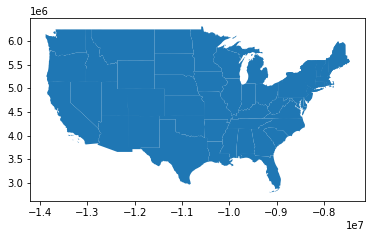

In [8]:
states.plot()

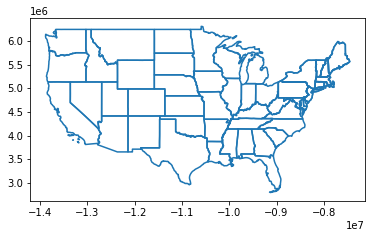

In [9]:
states.boundary.plot()

### Here are some cmap codes you can play around with.

viridis, plasma, inferno, magma, cividis
Greys, Purples, Blues, Greens, Oranges, Reds
YlOrBr, OrRd, PuRd, RdPu, BuPu, GnBu, PuBu, YlGnBu, PuBuGn, BuGn, YlGn
PiYg, PRGn, BrBG, PuOr, RdGy, RdBu, RdYlBu, Spectral, coolwarm, bwr, seismic
twilight, twilight_shifted, hsv
Pastel1, Pastel2, PAired, Accent, Dark2, Set1, Set2, Set3, tab10, tab20, tab20b, tab20c

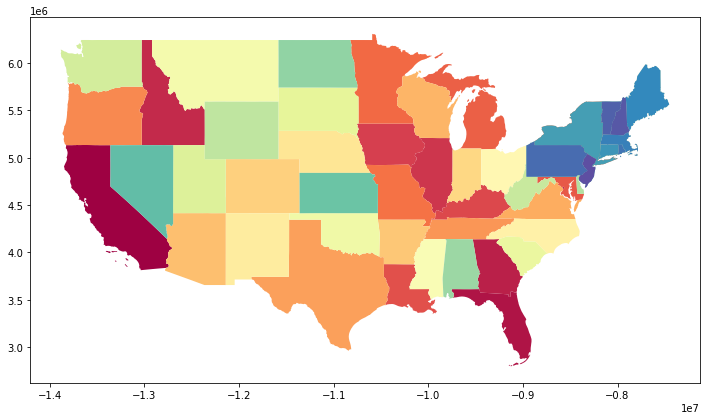

In [10]:
states.plot(cmap='Spectral', figsize=(12, 12))

In [11]:
# states['NAME']

In [12]:
states[states['NAME'] == 'California']

STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD         ALAND  \
0      06  01779778  0400000US06    06     CA  California   00  403483823181   

        AWATER region                                           geometry  
0  20483271881   West  MULTIPOLYGON Z (((-13201820.240 3933920.113 0....

### Plotting only one state

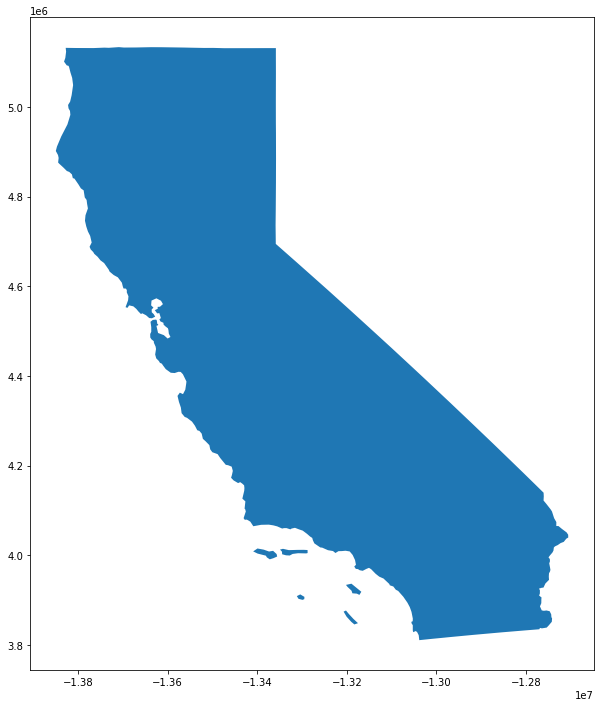

In [13]:
states[states['NAME'] == 'California'].plot(figsize=(12, 12))

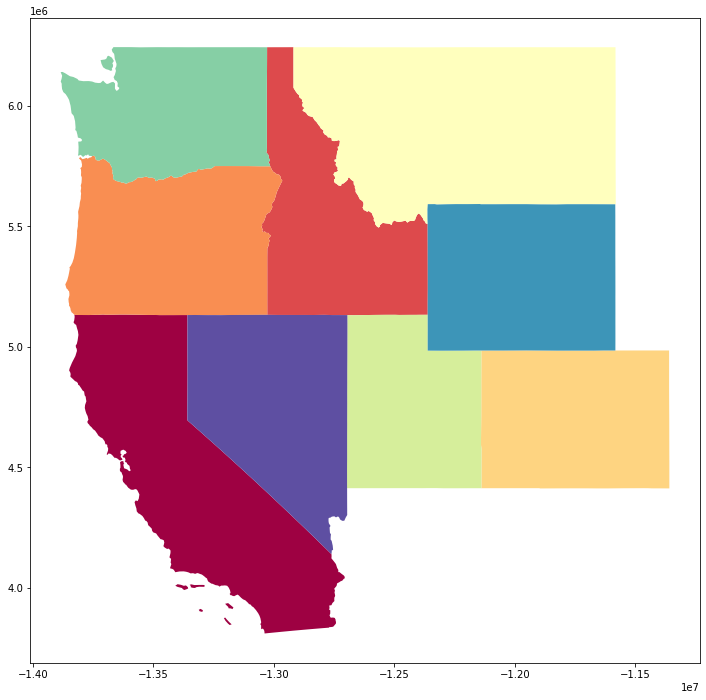

In [14]:
west = states[states['region'] == 'West']
west.plot(cmap='Spectral', figsize=(12, 12))

### Plotting with label

Text(-0.05, 0.5, 'label')

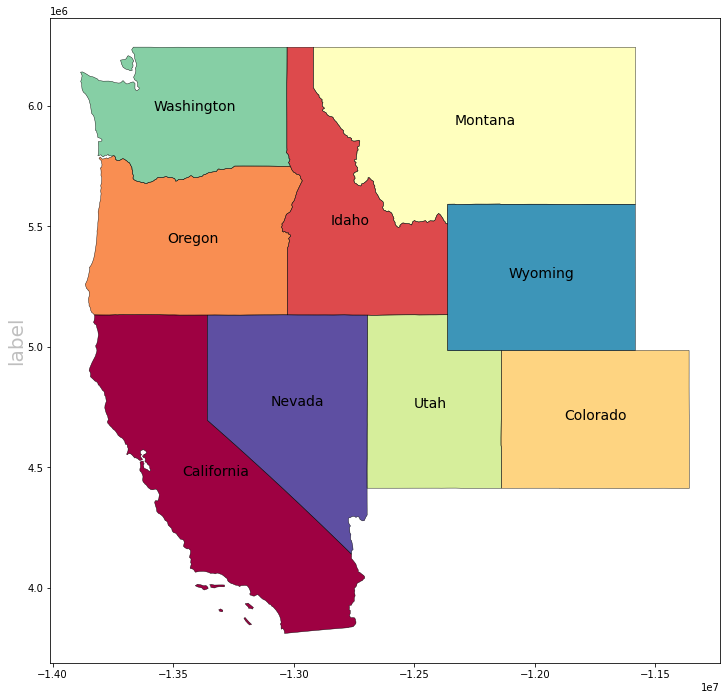

In [15]:
fig = plt.figure(1, figsize=(12,15)) 
ax = fig.add_subplot()
west.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
west.boundary.plot(ax=ax, color='Black', linewidth=.4)
west.plot(ax=ax, cmap='Spectral', figsize=(12, 12))
ax.text(-0.05, 0.5, 'label', transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

### Multi-map

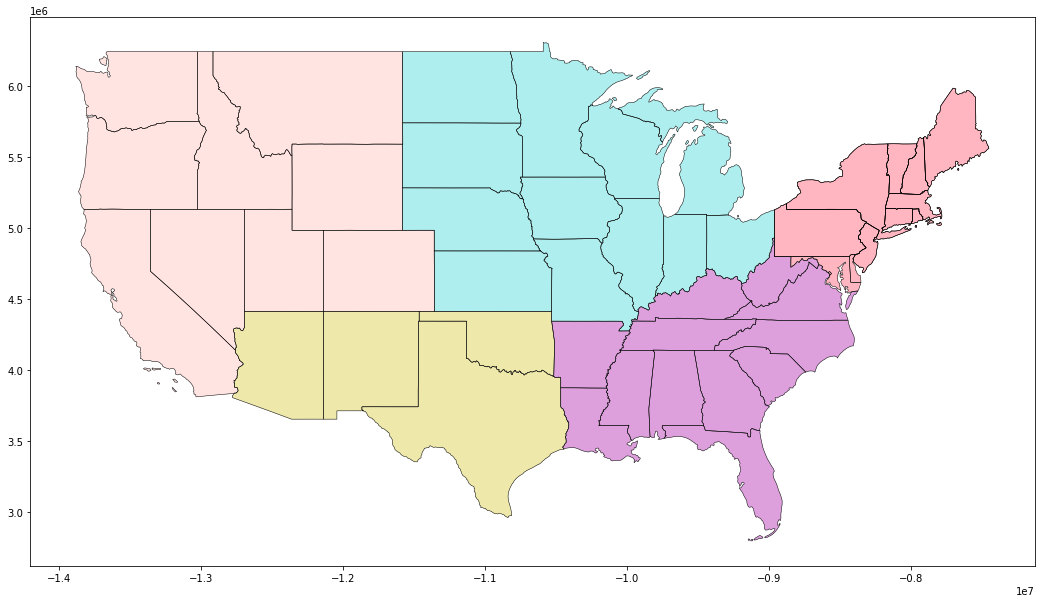

In [16]:
west = states[states['region'] == 'West']
southwest = states[states['region'] == 'Southwest']
southeast = states[states['region'] == 'Southeast']
midwest = states[states['region'] == 'Midwest']
northeast = states[states['region'] == 'Northeast']
us_boundary_map = states.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
west.plot(ax=us_boundary_map,  color="MistyRose")
southwest.plot(ax=us_boundary_map, color="PaleGoldenRod")
southeast.plot(ax=us_boundary_map, color="Plum")
midwest.plot(ax=us_boundary_map, color="PaleTurquoise")
final_map = northeast.plot(ax=us_boundary_map, color="LightPink")

### Changing crs from epsg=2163 to mercator (epsg=3395)

In [17]:
# def to_merc(x):
#     p = gp.GeoSeries([Point(x.longitude, x.latitude)])
#     p.crs = 'epsg:2163'
#     return p.to_crs(epsg=3395)

# df['coor'] = df.apply(to_merc, axis=1)

In [18]:
# df.to_csv("./assets/chipotle_stores_points.csv")

In [19]:
df_mercator = pd.read_csv('./assets/chipotle_stores_points.csv', sep=',', index_col = 0)
df_mercator

state          location  \
0          Alabama            Auburn   
1          Alabama        Birmingham   
2          Alabama        Birmingham   
3          Alabama        Birmingham   
4          Alabama           Cullman   
...            ...               ...   
2624     Wisconsin  Pleasant Prairie   
2625     Wisconsin         Wauwatosa   
2626  North Dakota             Fargo   
2627  North Dakota             Fargo   
2628       Wyoming          Cheyenne   

                                             address   latitude   longitude  \
0             346 W Magnolia Ave Auburn, AL 36832 US  32.606813  -85.487328   
1              300 20th St S Birmingham, AL 35233 US  33.509721  -86.802756   
2             3220 Morrow Rd Birmingham, AL 35235 US  33.595581  -86.647437   
3           4719 Highway 280 Birmingham, AL 35242 US  33.422582  -86.698279   
4          1821 Cherokee Ave SW Cullman, AL 35055 US  34.154134  -86.841220   
...                                              ...        ...         ...   
2624  9370 76th St # B Pleasant Prairie, WI 53158 US  42.565892  -87.921048   
2625  2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US  43.067723  -88.048222   
2626              1204 19th Ave N Fargo, ND 58102 US  46.904247  -96.796619   
2627               1680 45th St S Fargo, ND 58103 US  46.855337  -96.861416   
2628      1508 Dell Range Blvd Cheyenne, WY 82009 US  41.160718 -104.805699   

                                              coor  
0     POINT (-11132070.11277604 5591341.927497856)  
1     POINT (-11132071.97518301 5591343.201522727)  
2     POINT (-11132071.75528336 5591343.322678444)  
3      POINT (-11132071.8272633 5591343.078566663)  
4     POINT (-11132072.02965358 5591344.110820671)  
...                                            ...  
2624  POINT (-11132073.55864461 5591355.980229197)  
2625   POINT (-11132073.73870926 5591356.68833751)  
2626  POINT (-11132086.12484133 5591362.101699436)  
2627   POINT (-11132086.21658086 5591362.03268343)  
2628  POINT (-11132097.46403494 5591353.997094198)  

[2629 rows x 6 columns]

In [20]:
df_mercator.loc[0].coor.split(" ")[1].replace("(", "")

'-11132070.11277604'

In [21]:
df_mercator['longitude'] = df_mercator['coor'].apply(lambda x : float(x.split(" ")[1].replace("(", "")))
df_mercator['latitude'] = df_mercator['coor'].apply(lambda x : float(x.split(" ")[2].replace(")", "")))
df_mercator

state          location  \
0          Alabama            Auburn   
1          Alabama        Birmingham   
2          Alabama        Birmingham   
3          Alabama        Birmingham   
4          Alabama           Cullman   
...            ...               ...   
2624     Wisconsin  Pleasant Prairie   
2625     Wisconsin         Wauwatosa   
2626  North Dakota             Fargo   
2627  North Dakota             Fargo   
2628       Wyoming          Cheyenne   

                                             address      latitude  \
0             346 W Magnolia Ave Auburn, AL 36832 US  5.591342e+06   
1              300 20th St S Birmingham, AL 35233 US  5.591343e+06   
2             3220 Morrow Rd Birmingham, AL 35235 US  5.591343e+06   
3           4719 Highway 280 Birmingham, AL 35242 US  5.591343e+06   
4          1821 Cherokee Ave SW Cullman, AL 35055 US  5.591344e+06   
...                                              ...           ...   
2624  9370 76th St # B Pleasant Prairie, WI 53158 US  5.591356e+06   
2625  2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US  5.591357e+06   
2626              1204 19th Ave N Fargo, ND 58102 US  5.591362e+06   
2627               1680 45th St S Fargo, ND 58103 US  5.591362e+06   
2628      1508 Dell Range Blvd Cheyenne, WY 82009 US  5.591354e+06   

         longitude                                          coor  
0    -1.113207e+07  POINT (-11132070.11277604 5591341.927497856)  
1    -1.113207e+07  POINT (-11132071.97518301 5591343.201522727)  
2    -1.113207e+07  POINT (-11132071.75528336 5591343.322678444)  
3    -1.113207e+07   POINT (-11132071.8272633 5591343.078566663)  
4    -1.113207e+07  POINT (-11132072.02965358 5591344.110820671)  
...            ...                                           ...  
2624 -1.113207e+07  POINT (-11132073.55864461 5591355.980229197)  
2625 -1.113207e+07   POINT (-11132073.73870926 5591356.68833751)  
2626 -1.113209e+07  POINT (-11132086.12484133 5591362.101699436)  
2627 -1.113209e+07   POINT (-11132086.21658086 5591362.03268343)  
2628 -1.113210e+07  POINT (-11132097.46403494 5591353.997094198)  

[2629 rows x 6 columns]

### Showing the repartition

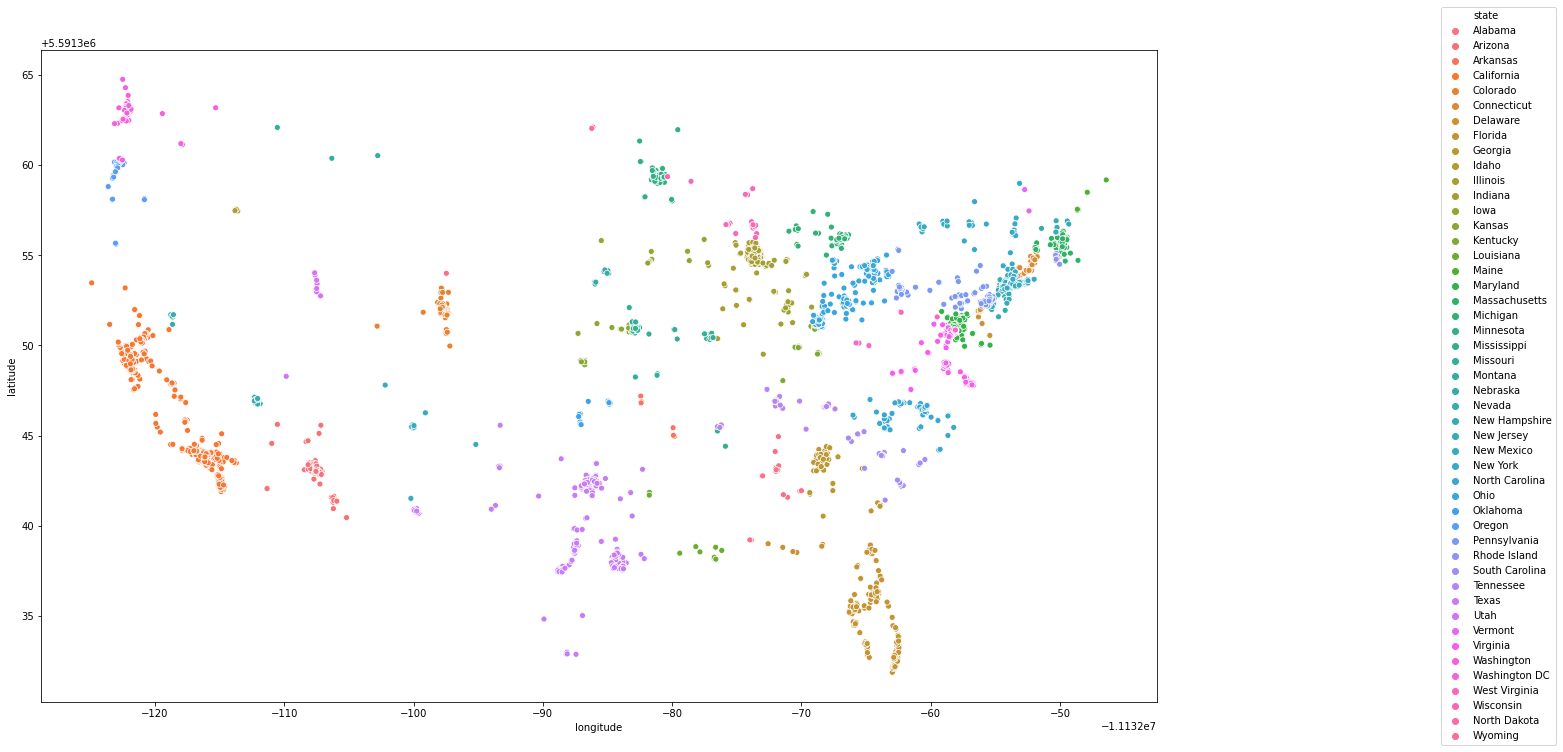

In [22]:
plt.figure(figsize=(20,12))
g = sns.scatterplot(x='longitude', y='latitude', data=df_mercator, hue='state')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [23]:
fig_px = px.scatter_mapbox(df, lat="latitude", lon="longitude",hover_name="state", zoom=3, height=500)

fig_px.update_layout(mapbox_style="open-street-map",margin={"r":0,"t":0,"l":0,"b":0})

fig_px.show()

### Choosing only relevant states

In [24]:
df.state.value_counts()

California        421
Texas             226
Ohio              193
Florida           177
New York          160
Illinois          144
Virginia          107
Pennsylvania       96
Maryland           94
Arizona            85
Colorado           79
Minnesota          71
New Jersey         69
North Carolina     65
Massachusetts      62
Georgia            61
Washington         43
Indiana            40
Missouri           39
Michigan           39
Oregon             32
Kansas             30
Nevada             29
Tennessee          26
Connecticut        24
Washington DC      21
Kentucky           21
South Carolina     21
Wisconsin          20
Alabama            15
Oklahoma           12
Utah               11
Nebraska           10
Iowa               10
Louisiana          10
New Mexico          9
Rhode Island        9
Delaware            9
New Hampshire       8
Arkansas            6
West Virginia       6
Maine               5
Idaho               4
Montana             3
North Dakota        2
Mississipp

In [25]:
df = df.groupby('state').filter(lambda x : len(x)>20)
df

state       location  \
15          Arizona       Avondale   
16          Arizona        Buckeye   
17          Arizona    Casa Grande   
18          Arizona     Cave Creek   
19          Arizona       Chandler   
...             ...            ...   
2595  Washington DC  Washington DC   
2596  Washington DC  Washington DC   
2597  Washington DC  Washington DC   
2598  Washington DC  Washington DC   
2599  Washington DC  Washington DC   

                                                address   latitude   longitude  
15     9925 W McDowell Rd Ste 101 Avondale, AZ 85392 US  33.464377 -112.273194  
16                 944 S Watson Rd Buckeye, AZ 85326 US  33.438308 -112.558304  
17    1775 E Florence Blvd Ste 1 Casa Grande, AZ 851...  32.879130 -111.711235  
18    5355 E Carefree Hwy Bldg E Cave Creek, AZ 8533...  33.799146 -111.966084  
19    2895 S Alma School Rd Ste 1 Chandler, AZ 85286 US  33.263922 -111.857261  
...                                                 ...        ...         ...  
2595         413 8th Street, SE Washington, DC 20003 US  38.883249  -76.995256  
2596  4301 Wisconsin Ave NW Unit B Washington, DC 20...  38.945016  -77.077753  
2597  50 Massachusetts Ave NE Spc L037 Washington, D...  38.897677  -77.006877  
2598                601 F St NW Washington, DC 20004 US  38.898082  -77.021014  
2599    625 Monroe St NE Ste A8 Washington, DC 20017 US  38.932063  -76.996451  

[2475 rows x 5 columns]

In [26]:
df.state.value_counts()

California        421
Texas             226
Ohio              193
Florida           177
New York          160
Illinois          144
Virginia          107
Pennsylvania       96
Maryland           94
Arizona            85
Colorado           79
Minnesota          71
New Jersey         69
North Carolina     65
Massachusetts      62
Georgia            61
Washington         43
Indiana            40
Michigan           39
Missouri           39
Oregon             32
Kansas             30
Nevada             29
Tennessee          26
Connecticut        24
Kentucky           21
South Carolina     21
Washington DC      21
Name: state, dtype: int64

In [27]:
# check number of invalid metric entries
print(df['longitude'].isnull().sum())
print(df['latitude'].isnull().sum())

0
0


In [28]:
# adjusting index
df = df.reset_index(drop=True)

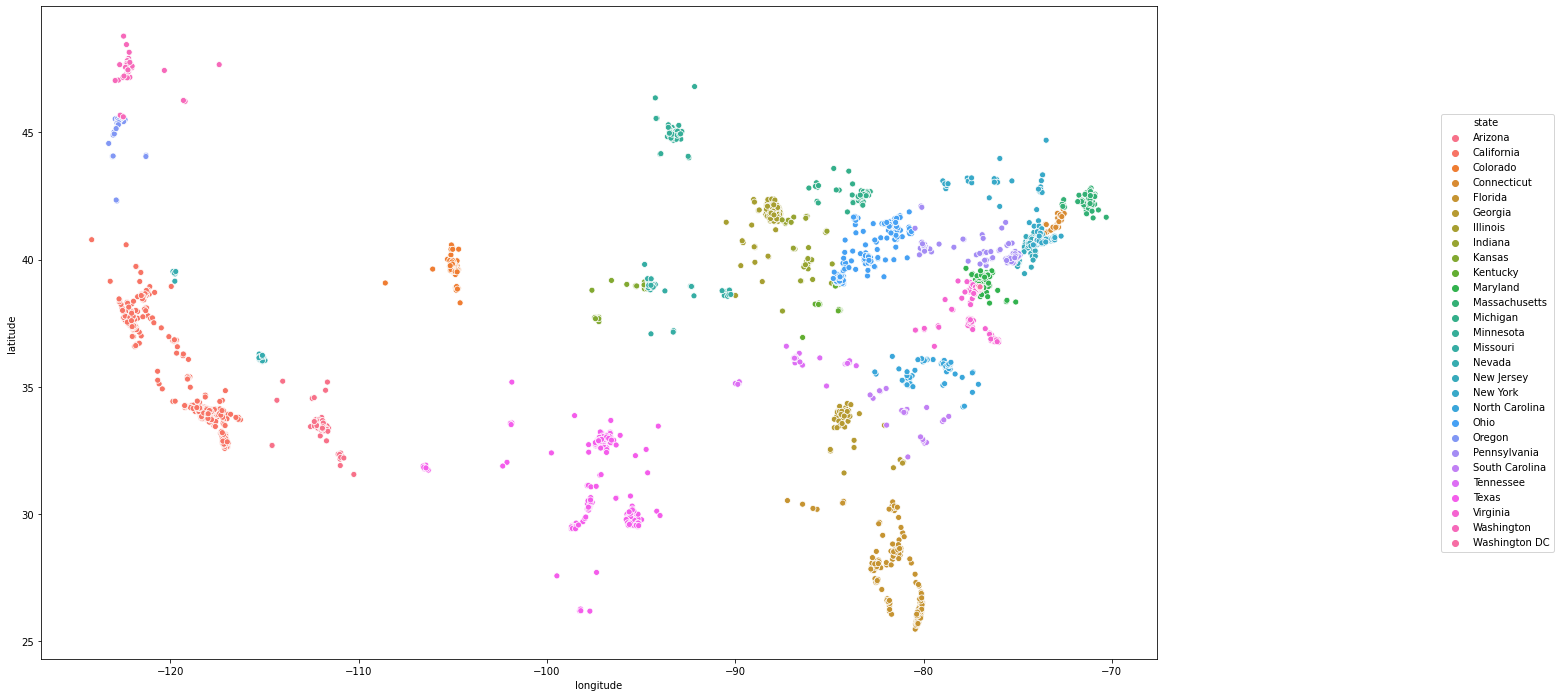

In [29]:
plt.figure(figsize=(20,12))
g = sns.scatterplot(x='longitude', y='latitude', data=df, hue='state')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

## Plot a Dendogram

More info on dendogram : https://www.displayr.com/what-is-dendrogram/

In [30]:
data = df.iloc[:,-2:].to_numpy()

data.shape

(2475, 2)

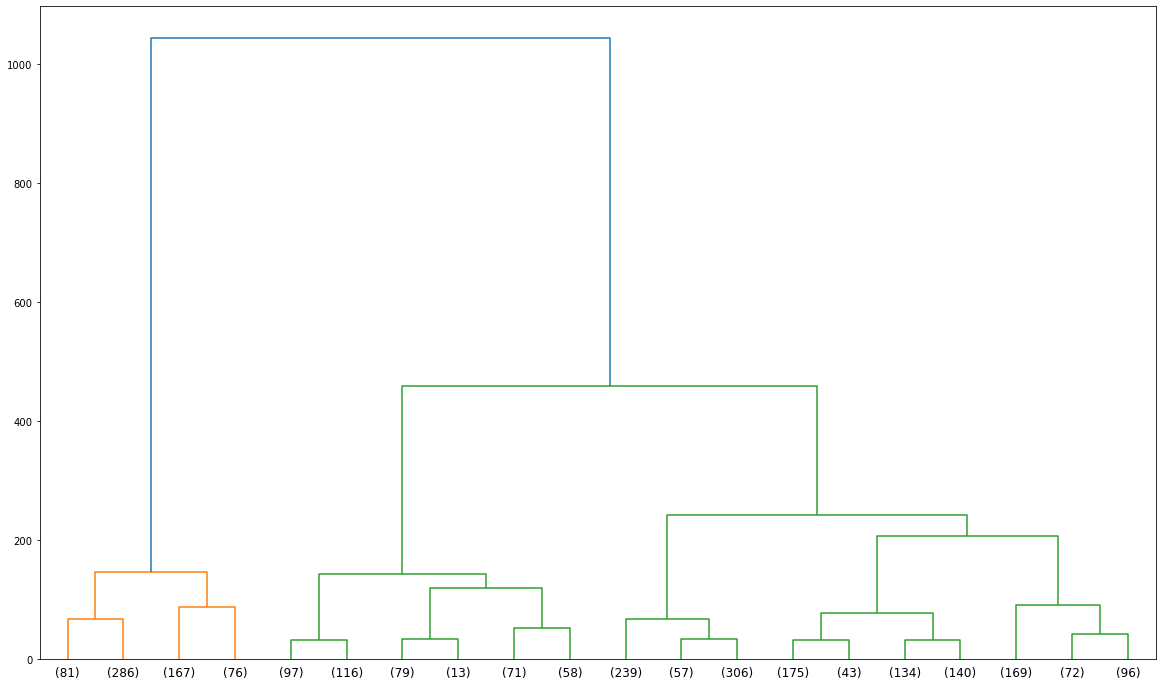

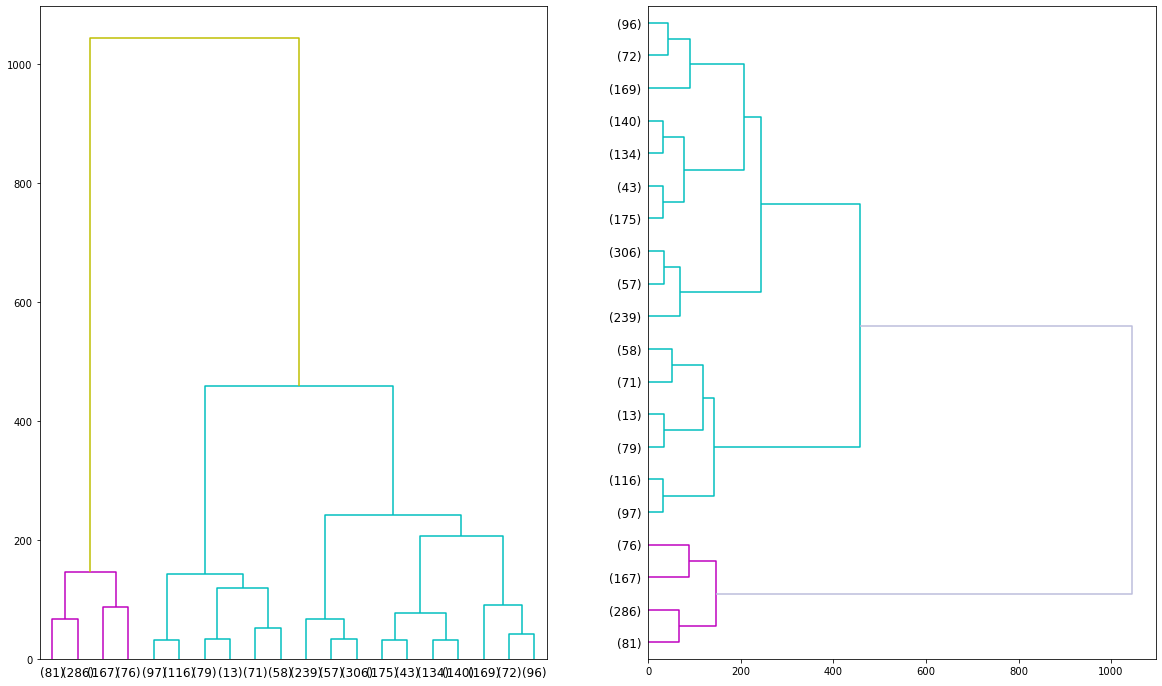

In [31]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(data, 'ward')
plt.figure(figsize=(20, 12))
dn = hierarchy.dendrogram(Z, p=20, truncate_mode='lastp')

hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 2, figsize=(20, 12))
dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y',
                           orientation='top', p=20, truncate_mode='lastp')
dn2 = hierarchy.dendrogram(Z, ax=axes[1],
                           above_threshold_color='#bcbddc',
                           orientation='right', p=20, truncate_mode='lastp')
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()


## Let's cluster all of that

### Using k-mean

In [32]:
df_coord = df[['latitude', 'longitude']]
df_coord

latitude   longitude
0     33.464377 -112.273194
1     33.438308 -112.558304
2     32.879130 -111.711235
3     33.799146 -111.966084
4     33.263922 -111.857261
...         ...         ...
2470  38.883249  -76.995256
2471  38.945016  -77.077753
2472  38.897677  -77.006877
2473  38.898082  -77.021014
2474  38.932063  -76.996451

[2475 rows x 2 columns]

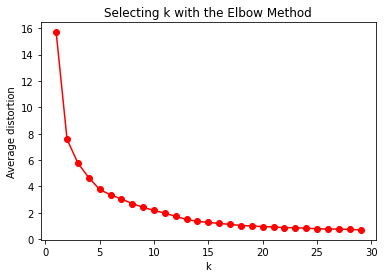

In [33]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.metrics import silhouette_score

clusters = range(1,30)

meanDistortions = []

for k in clusters:
    km = KMeans(n_clusters=k)
    km.fit(df_coord)
    predict=km.predict(df_coord)
    meanDistortions.append(sum(np.min(cdist(df_coord,km.cluster_centers_, 'euclidean'), axis=1)) / 
                           df_coord.shape[0])

plt.plot(clusters, meanDistortions, 'ro-')

plt.title('Selecting k with the Elbow Method')

plt.xlabel('k');

plt.ylabel('Average distortion');

In [34]:
from sklearn.cluster import KMeans

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=15).fit(df_coord)  

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
df_coord = df_coord.join(cluster_labels.to_frame())

In [35]:
df_coord.dropna(axis=0, inplace=True, subset=['cluster'])

In [36]:
df_coord['cluster'].value_counts()

9     308
0     295
1     286
7     272
2     218
4     198
8     169
10    164
14     95
3      94
13     92
5      80
6      75
11     71
12     58
Name: cluster, dtype: int64

<Figure size 864x864 with 0 Axes>

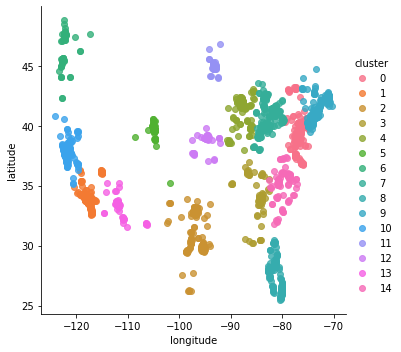

In [37]:
plt.figure(figsize=(12,12))
sns.lmplot(x='longitude', y='latitude', height=5, data=df_coord,fit_reg=False, hue='cluster');


In [38]:
predict = km.fit_predict(df_coord)

In [39]:
km_silhouette_score = silhouette_score(df_coord, predict)

In [40]:
km_silhouette_score

0.6749176063304727

In [41]:
centroids = km.cluster_centers_

In [42]:
lat = []
lon = []
for i in cluster_centers:
    lon.append(i[0])
    lat.append(i[1])

In [43]:
df_cluster = pd.DataFrame(lat,lon).reset_index()

In [44]:
df_cluster.columns = ['lat', 'lon']

In [45]:
fig_px = px.scatter_mapbox(df_coord, lat="latitude", lon="longitude",color="cluster",hover_name="cluster", zoom=3, height=500)

fig_px.update_layout(mapbox_style="open-street-map",margin={"r":0,"t":0,"l":0,"b":0})

fig_px.show()

In [46]:
fig_px = px.scatter_mapbox(df_cluster, lat="lat", lon="lon", size_max=20,zoom=3, height=500)

fig_px.update_layout(mapbox_style="open-street-map",margin={"r":0,"t":0,"l":0,"b":0})

fig_px.show()

### Using dbscan

In [ ]:
# make new dataframe with relevant metrics
df_metrics = df['longitude'].to_frame().join(df['latitude'].to_frame())

# z-score normalisation
df_metrics_normalized=(df_metrics-df_metrics.mean())/df_metrics.std()
df_metrics_normalized = df_metrics_normalized.rename(columns={'longitude': 'longitude_zscore', 
                                                              'latitude':'latitude_zscore'})

In [ ]:
from sklearn.cluster import DBSCAN

# fit a kmeans object to the dataset
dbscan = DBSCAN(eps=0.2, min_samples=2).fit(df_metrics_normalized)

# add cluster index to dataframe
cluster_labels = pd.Series(dbscan.labels_, name='cluster')
dbscan_df = df_metrics_normalized.join(cluster_labels.to_frame())

In [ ]:
sns.lmplot(x='longitude_zscore', y='latitude_zscore',  height=7, data=dbscan_df,
           fit_reg=False, hue='cluster')
ax = plt.gca()
ax.set_title("Clusters with DBSCAN")

### Using agglomerative clustering (ward linkage)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# fit a kmeans object to the dataset
agglo_ward = AgglomerativeClustering(n_clusters=nb_clusters).fit(df_metrics_normalized)

# add cluster index to dataframe
cluster_labels = pd.Series(agglo_ward.labels_, name='cluster')
agglo_ward_df = df_metrics_normalized.join(cluster_labels.to_frame())

In [ ]:
sns.lmplot(x='longitude_zscore', y='latitude_zscore',  height=7, data=agglo_ward_df,
           fit_reg=False, hue='cluster')
ax = plt.gca()
ax.set_title("Clusters with Agglomerative Clustering - Ward linkage")